# Brain Tumor Detection

In [72]:

import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 


In [73]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 



# 0 - Tumor
# 1 - Normal

OneHotEncoder()

# DATA PRE-PROCESSING

# List of Images with Tumor

In [74]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'C:\Users\bannu\Documents\BANNU\CNN\Brain-Tumor-Detection-master\Brain-Tumor-Detection-master\yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

# List of Images without Tumor

In [75]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"C:\Users\bannu\Documents\BANNU\CNN\Brain-Tumor-Detection-master\Brain-Tumor-Detection-master\no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [76]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [77]:
result = np.array(result)
result = result.reshape(139,2)

# Splitting the Data into Training & Testing

In [78]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.3, shuffle=True, random_state=0)

# Model Building -CNN

In [79]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_4 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)       

In [80]:
y_train.shape

(97, 2)

In [81]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 5s 1s/step - loss: 15.2205 - val_loss: 104.0136
Epoch 2/30
3/3 [==============================] - 4s 1s/step - loss: 32.3667 - val_loss: 107.3627
Epoch 3/30
3/3 [==============================] - 4s 1s/step - loss: 18.4531 - val_loss: 66.5266
Epoch 4/30
3/3 [==============================] - 4s 1s/step - loss: 3.6600 - val_loss: 11.0323
Epoch 5/30
3/3 [==============================] - 4s 1s/step - loss: 5.6279 - val_loss: 20.9456
Epoch 6/30
3/3 [==============================] - 4s 1s/step - loss: 0.7375 - val_loss: 41.8913
Epoch 7/30
3/3 [==============================] - 4s 1s/step - loss: 2.0241 - val_loss: 46.6555
Epoch 8/30
3/3 [==============================] - 4s 1s/step - loss: 3.4432 - val_loss: 37.9804
Epoch 9/30
3/3 [==============================] - 4s 1s/step - loss: 0.5895 - val_loss: 25.5423
Epoch 10/30
3/3 [==============================] - 4s 1s/step - loss: 0.7512 - val_loss: 15.8801
Epoch 11/30
3/3 [=================

# Plotting Losses

In [82]:
model.evaluate(x_test, y_test, verbose=0)

11.743264198303223

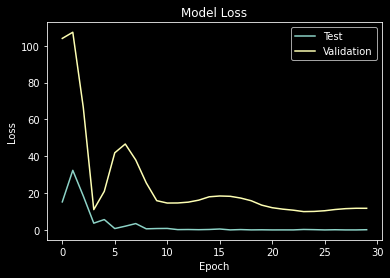

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# Checking the Model

In [84]:
def names(number):
    if number==0:
        return 'Tumor identified , Further Examination is Prefered '
    else:
        return 'Not a Tumor'

100.0% Confidence This Is Tumor identified , Further Examination is Prefered 


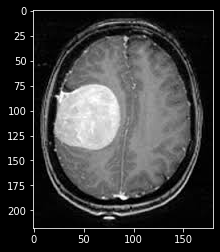

In [85]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\bannu\Documents\BANNU\CNN\Y1.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.99566078186035% Confidence This Is A Not a Tumor


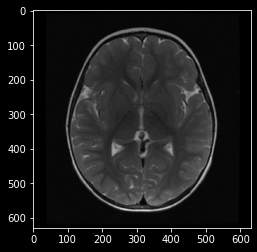

In [86]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\bannu\Documents\BANNU\CNN\2 no.jpeg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

# Import & Server Connection

In [89]:
import anvil.server
anvil.server.connect("SHPVB6667A2L5R7TQTK46FBL-LDH4OMOWVAEQKFUG")


Disconnecting from previous connection first...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER
Reconnecting Anvil Uplink...


# Server Launch

In [90]:
import tensorflow as tf
import numpy as np
import anvil.media
import PIL
from PIL import *
from PIL import Image
@anvil.server.callable

def classify_image(file): 
    with anvil.media.TempFile(file) as filename:
        img = Image.open(filename)
        
    x = np.array(img.resize((128,128)))
    x = x.reshape(1,128,128,3)
    res = model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]
    arr=tf.keras.utils.img_to_array(img, data_format=None, dtype=None)
    arr=np.expand_dims (arr, axis=0)
    arr /= 255.0
    score = res[0][classification]*100
    return(names(classification)+"  ACCURACY-",float(score))

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.


# Final Year Project
18691A0533 - Ganesh Babu.E
18691A0543 - Hari Chandana.D
18691A0544 - HariSrujan.c
18691A0545 - Haridhar.G